In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import KFold

In [4]:
df=pd.read_csv(r'/Users/loganheft/Desktop/Bank Data/data/bank-full.csv',sep=";")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df=df.replace('admin.','admin')

In [7]:
## These are the first five data points in my data set. We see that there are 16 features and y which is 

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

No missing values

In [11]:
percent_missing_ft = df.isnull().sum(axis=0)/df.shape[0]
percent_missing_ft

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

Values in each categorical column

In [12]:
object_df=df[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]
for i in object_df:
    unique_values=df[i].unique()
    print(sorted(unique_values))

['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
['divorced', 'married', 'single']
['primary', 'secondary', 'tertiary', 'unknown']
['no', 'yes']
['no', 'yes']
['no', 'yes']
['cellular', 'telephone', 'unknown']
['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
['failure', 'other', 'success', 'unknown']
['no', 'yes']


Checking to see if data is balanced

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

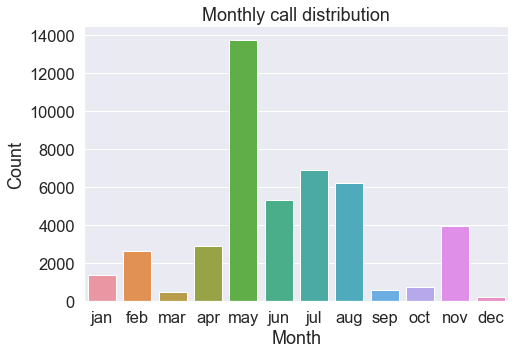

In [19]:
sns.set(font_scale=1.5)
g = sns.catplot(x="month",data=df,order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'] ,kind="count",height=5,aspect=1.5);
g.set(xlabel='Month', ylabel='Count',title='Monthly call distribution')

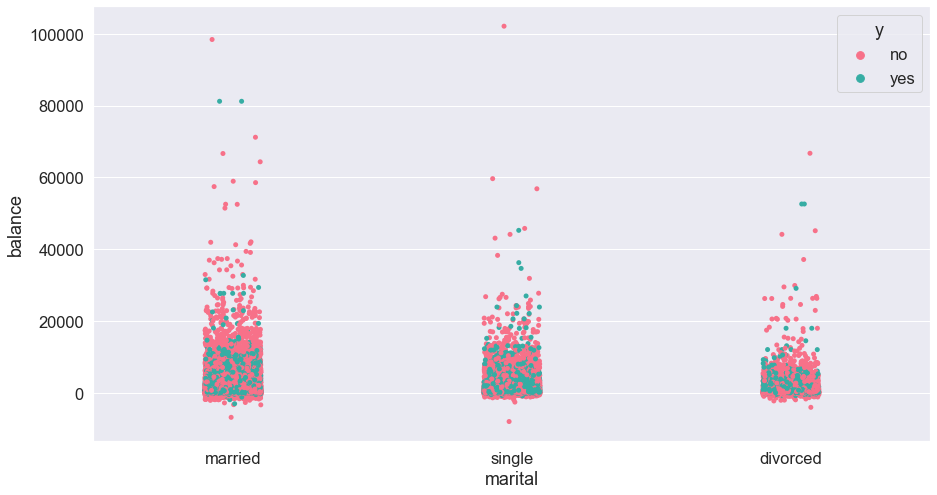

In [20]:
sns.stripplot(data=df,x='marital',y='balance',hue='y',palette="husl")
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Age and Target Variable Violin Plot')

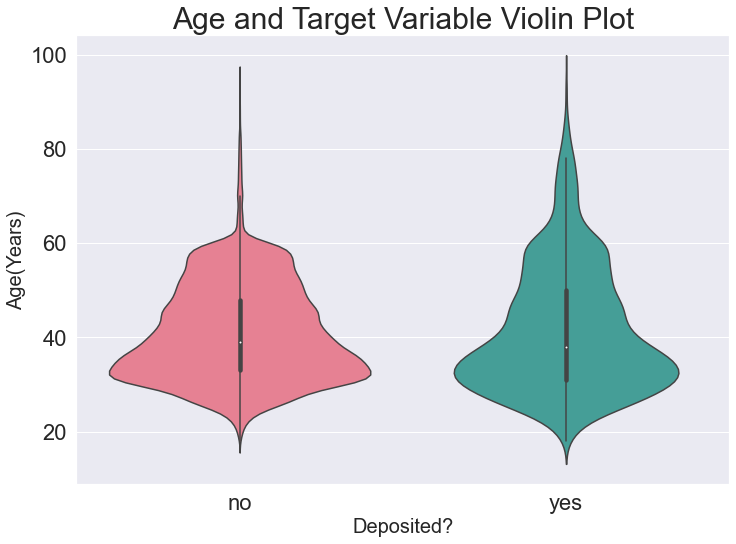

In [21]:
sns.set(font_scale=2)
violin=sns.violinplot(x='y',y='age',data=df,palette="husl")
sns.set(rc={'figure.figsize':(11.7,8.27)})
violin.set_xlabel("Deposited?",fontsize=20)
violin.set_ylabel("Age(Years)",fontsize=20)
violin.set_title('Age and Target Variable Violin Plot',fontsize=30)

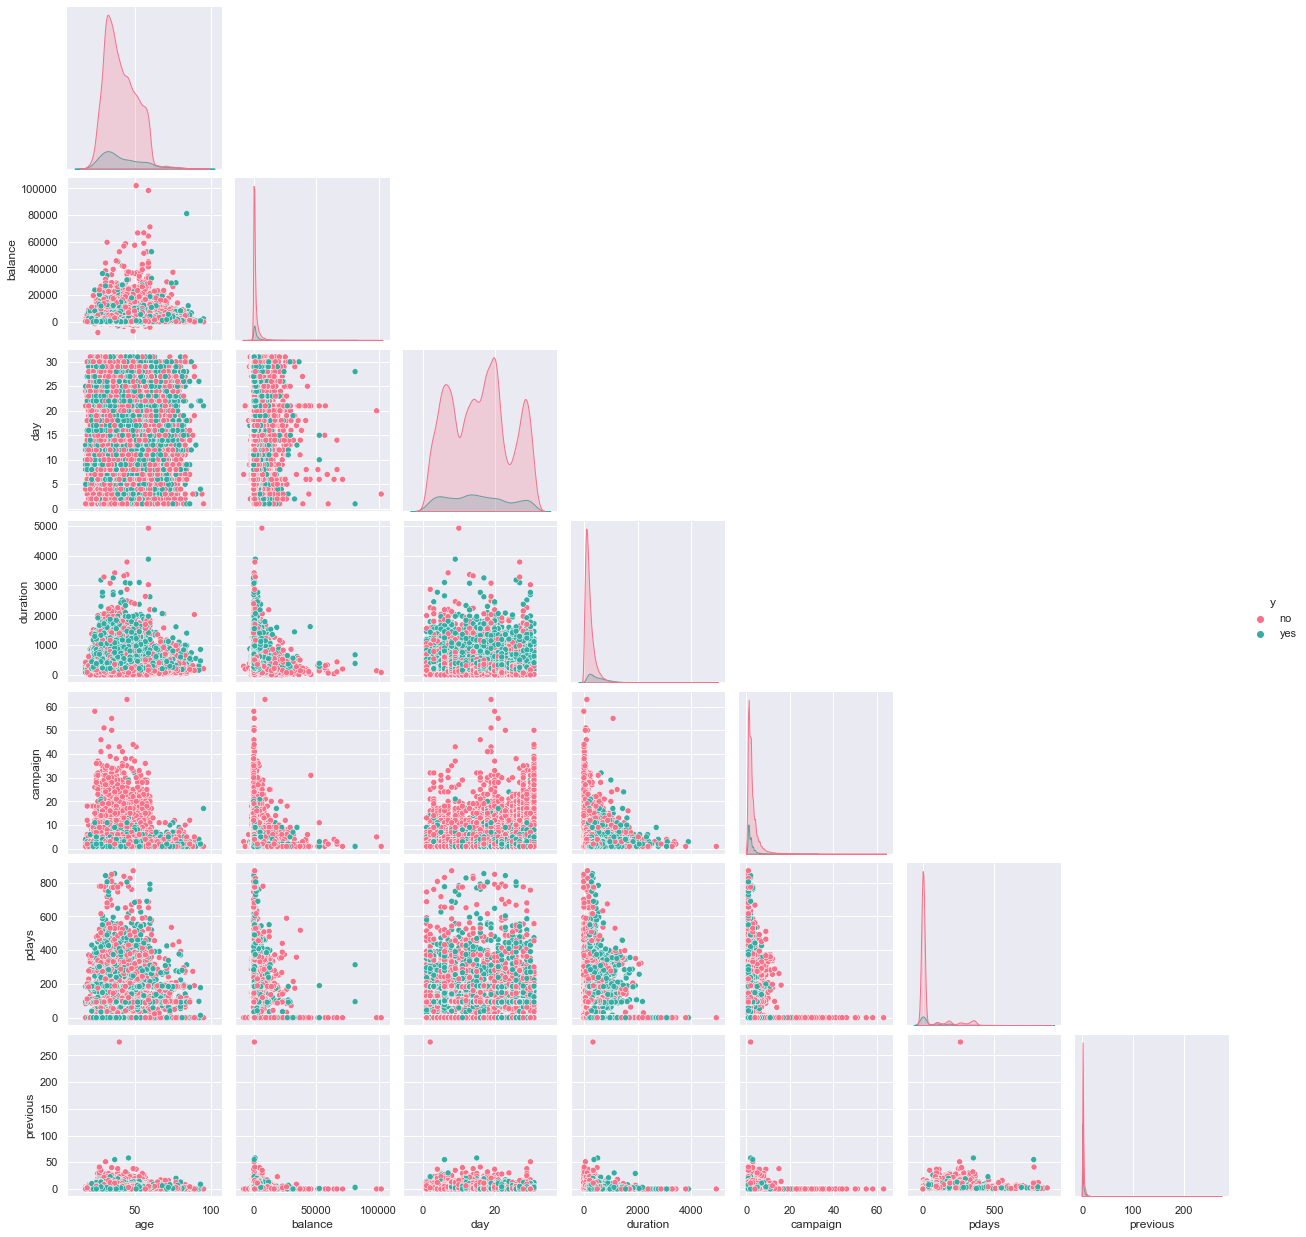

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(df,hue='y',palette='husl',corner=True)

Text(0.5, 1.0, 'Non-Categorical Data Heatmap')

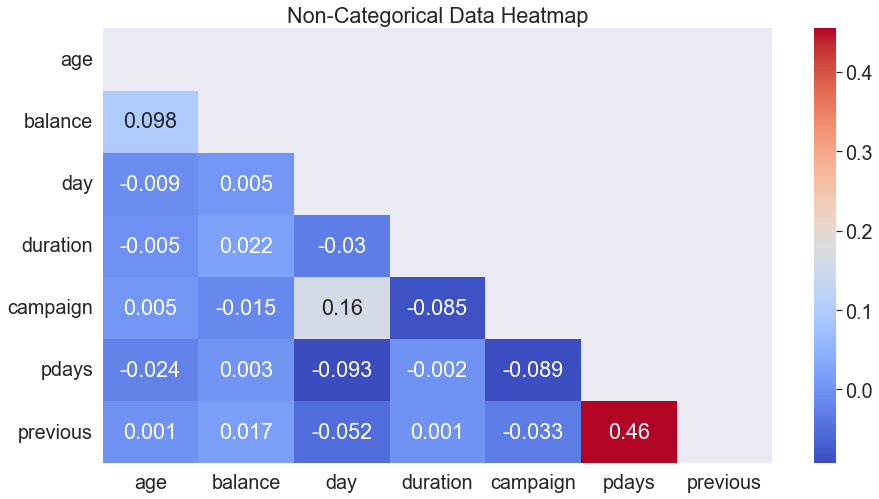

In [23]:
corr=df.corr()
corr_round=corr.round(decimals=3)
matrix=np.triu(corr_round)
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=1.8)


heatmap=sns.heatmap(corr_round,annot=True,cmap='coolwarm',mask=matrix)
heatmap.set_title('Non-Categorical Data Heatmap')


In [24]:
job=df.groupby('job')
job.mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import ParameterGrid, train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import shap

randomstate=3
test_scores = []
nr_states=3
final_models = []


results=[]

RF_roc_auc=[]
log_roc_auc=[]
DT_roc_auc=[]
SVC_roc_auc=[]
KN_roc_auc=[]
XGB_roc_auc=[]

RF = RandomForestClassifier(random_state=3)
Log=LogisticRegression(random_state=3)
XGB=GradientBoostingClassifier(random_state=3)
KN = KNeighborsClassifier()
DT=DecisionTreeClassifier(random_state=3)
SVC=SVC()


df.y = df.y.replace(["yes"],1)
df.y = df.y.replace(["no"],0)
df.loan = df.loan.replace(["yes"], 1)
df.loan = df.loan.replace(["no"], 0)
df.housing = df.housing.replace(["yes"], 1)
df.housing = df.housing.replace(["no"], 0)
df.default = df.default.replace(["yes"], 1)
df.default = df.default.replace(["no"],0)

y = df['y']
X = df.loc[:, df.columns != 'y']
ftr_names = X.columns





In [7]:
cat_ftrs = ['job','marital','education','default','housing','loan','contact','month','poutcome']

cont_ftrs = ['age','balance','day','duration','campaign','pdays','previous']

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(
        transformers=[
            ('MinMax', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])


**Hyperparameter Tuning Function**

In [57]:
def MLpipe_KFold_RMSE(X, y, preprocessor,ML_algo, param_grid):   
    for val in range(5):
        X_other, X_test, Y_other, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 3 + val)
        k_fold = KFold(n_splits = 4, shuffle = True, random_state = 3 + val)
        pipe = make_pipeline(preprocessor,ML_algo)
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = "roc_auc", 
                            cv=k_fold, return_train_score = True, n_jobs=-1, verbose=True)
        grid.fit(X_other, Y_other)
        results = grid.cv_results_
        print('best model parameters:',grid.best_params_)
        print('roc auc score:',grid.best_score_)
        final_models.append(grid)
        y_test_pred = final_models[-1].predict(X_test)


**RANDOM FOREST**

In [28]:
#Determine what parameters are the best
param_grid = {'randomforestclassifier__n_estimators': [10,100,1000],
                  'randomforestclassifier__max_features': ['sqrt','log2']}
ML_algo= RF


MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)


Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1000}
roc auc score: 0.9302617262895667
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1000}
roc auc score: 0.9313465937841405
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1000}
roc auc score: 0.9306969124661338
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1000}
roc auc score: 0.9296380892707924
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassif

The hyperparameters {sqrt,n_estimators=1000} show up most frequently therefore we train our final model with these parameters. This same procedure of identifying which hyperparameters show up most frequently in the various models is repeated for all the models.

In [29]:
def Final_RF(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)   

    pipe = make_pipeline(preprocessor,RF)    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__n_estimators': [1000],
                  'randomforestclassifier__max_features': ['sqrt']}    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
     final_models.append(grid)
    
    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    RF_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test




In [30]:
grid, feature_names,X_test, y_test = Final_RF(X,y,3,4)
RF_roc_auc=grid.best_score_



Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([23.39720869]), 'std_fit_time': array([0.06383915]), 'mean_score_time': array([1.21765178]), 'std_score_time': array([0.00357634]), 'param_randomforestclassifier__max_features': masked_array(data=['sqrt'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_randomforestclassifier__n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 1000}], 'split0_test_score': array([0.9256347]), 'split1_test_score': array([0.92965832]), 'split2_test_score': array([0.92961657]), 'split3_test_score': array([0.93613732]), 'mean_test_score': array([0.93026173]), 'std_test_score': array([0.00376538]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([1.]), 'split1_train_score': array([1.]), 'split2_train_sco

We use a TreeExplainer since our model is a decision tree.

In [31]:
shap.initjs() 
explainer = shap.TreeExplainer(grid.best_estimator_[1])
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:50])
print(np.shape(shap_values))

(9043, 51)
(2, 50, 51)


Local feature importance of point with index 1.

In [32]:
index = 1 
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.8841037104622864


Global feature importance

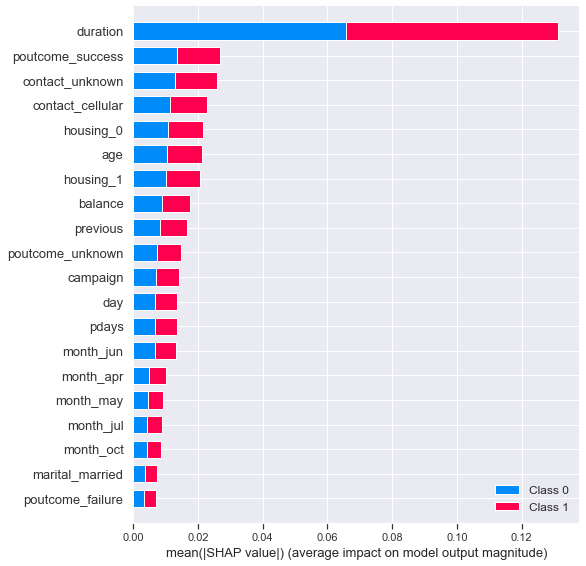

In [33]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names)

**LOGISTIC REGRESSION**

In [34]:
param_grid = {
    "logisticregression__solver":['newton-cg','lbfgs','liblinear','saga'],
    'logisticregression__C':[1000,100,10,1,.1,],
    'logisticregression__max_iter':[1000]
}

ML_algo= Log

MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
best model parameters: {'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'lbfgs'}
roc auc score: 0.9049716266614664
Fitting 4 folds for each of 20 candidates, totalling 80 fits
best model parameters: {'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'liblinear'}
roc auc score: 0.907270129289806
Fitting 4 folds for each of 20 candidates, totalling 80 fits
best model parameters: {'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'saga'}
roc auc score: 0.9055676877279553
Fitting 4 folds for each of 20 candidates, totalling 80 fits
best model parameters: {'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'liblinear'}
roc auc score: 0.9068889538902762
Fitting 4 folds for each of 20 candidates, totalling 80 fits
best model parameters: {'

In [81]:
def Final_Log(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    pipe = make_pipeline(preprocessor,Log) 
    param_grid = {
    "logisticregression__solver":['liblinear',],
    'logisticregression__C':[1000],
    'logisticregression__max_iter':[1000]}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    log_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test







In [82]:
grid, feature_names,X_test, y_test = Final_Log(X,y,3,4)
RF_roc_auc=grid.best_score_

Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([0.26992315]), 'std_fit_time': array([0.02306027]), 'mean_score_time': array([0.02629679]), 'std_score_time': array([0.00518699]), 'param_logisticregression__C': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_logisticregression__max_iter': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_logisticregression__solver': masked_array(data=['liblinear'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'liblinear'}], 'split0_test_score': array([0.89783227]), 'split1_test_score': array([0.90687144]), 'split2_test_score': array([0.90537866]), 'split3_test_score': array([0.9097974]), 'mean_test_score': array([0.90496994]), 'std_test_score': array([0.00441

In [37]:
shap.initjs() 
X_test_transformed = grid.best_estimator_[0].transform(X_test)
masker = shap.maskers.Independent(X_test_transformed)
explainer = shap.LinearExplainer(grid.best_estimator_[1],data=X_test_transformed,masker=masker)
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:50])
print(shap_values)

(9043, 51)
[[ 0.0036604   0.01321293  0.03973915 ...  0.03064443 -0.13423235
  -0.24453757]
 [ 0.00719702 -0.00715461 -0.10182524 ...  0.03064443 -0.13423235
   0.59869543]
 [ 0.00631287 -0.01070868 -0.08160176 ...  0.03064443 -0.13423235
  -0.24453757]
 ...
 [-0.01667517 -0.01371597  0.13074483 ...  0.03064443 -0.13423235
  -0.24453757]
 [-0.00960193 -0.00719106  0.0296274  ...  0.03064443 -0.13423235
  -0.24453757]
 [-0.01313855 -0.01052642 -0.08160176 ...  0.03064443 -0.13423235
  -0.24453757]]


In [38]:
index =4 
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)

The below function is used to scale the data using a standard scaler as opposed to a minmax scaler as it is neccesary for the coefficents of a logistic regression modal features to have a zero mean and the same standard deviation.

In [39]:
def Standard_Scale_Log(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    cat_ftrs = ['job','marital','education','default','housing','loan','contact','month','poutcome']
    cont_ftrs = ['age','balance','day','duration','campaign','pdays','previous']



    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    
   
    final_scaler = StandardScaler()


    pipe = make_pipeline(preprocessor,final_scaler,Log)    # the parameter(s) we want to tune
    param_grid = {
    "logisticregression__solver":['liblinear',],
    'logisticregression__C':[1000],
    'logisticregression__max_iter':[1000]}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    log_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test








Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([0.32569879]), 'std_fit_time': array([0.00673023]), 'mean_score_time': array([0.01998705]), 'std_score_time': array([0.00170094]), 'param_logisticregression__C': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_logisticregression__max_iter': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_logisticregression__solver': masked_array(data=['liblinear'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'logisticregression__C': 1000, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'liblinear'}], 'split0_test_score': array([0.89782891]), 'split1_test_score': array([0.9068768]), 'split2_test_score': array([0.90537998]), 'split3_test_score': array([0.90979953]), 'mean_test_score': array([0.9049713]), 'std_test_score': array([0.004419

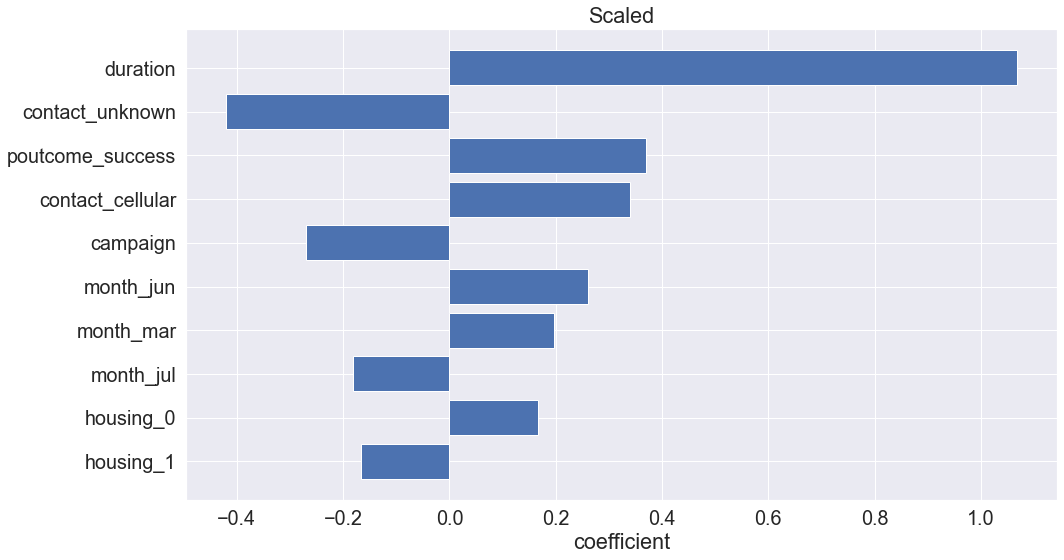

In [40]:
grid, feature_names, X_test, y_test = Standard_Scale_Log(X,y,3,4)
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('Scaled')
plt.tight_layout()

In [41]:
np.random.seed(3)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9098894750137724
test baseline =  0.8786906999889417
shuffling age
   shuffled test score: 0.91 +/- 0.0
shuffling job
   shuffled test score: 0.908 +/- 0.0
shuffling marital
   shuffled test score: 0.909 +/- 0.001
shuffling education
   shuffled test score: 0.909 +/- 0.0
shuffling default
   shuffled test score: 0.91 +/- 0.0
shuffling balance
   shuffled test score: 0.91 +/- 0.0
shuffling housing
   shuffled test score: 0.9 +/- 0.001
shuffling loan
   shuffled test score: 0.908 +/- 0.001
shuffling contact
   shuffled test score: 0.861 +/- 0.002
shuffling day
   shuffled test score: 0.91 +/- 0.0
shuffling month
   shuffled test score: 0.871 +/- 0.003
shuffling duration
   shuffled test score: 0.732 +/- 0.004
shuffling campaign
   shuffled test score: 0.904 +/- 0.001
shuffling pdays
   shuffled test score: 0.91 +/- 0.0
shuffling previous
   shuffled test score: 0.91 +/- 0.0
shuffling poutcome
   shuffled test score: 0.883 +/- 0.001


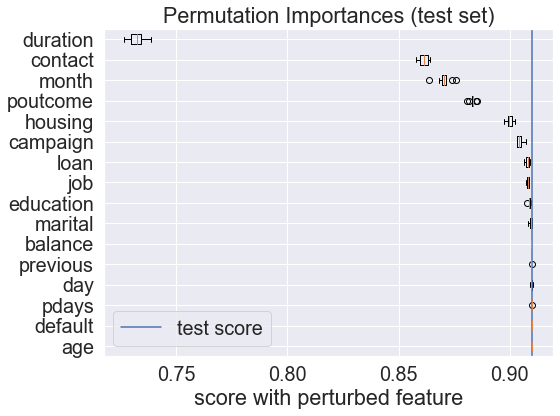

In [42]:
import matplotlib.pyplot as plt
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

**DECISION TREE CLASSIFIER**

In [43]:
param_grid = {
    "decisiontreeclassifier__criterion":['gini','entropy'],
    'decisiontreeclassifier__max_features':['sqrt','log2']}

ML_algo=DT


MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)


Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_features': 'sqrt'}
roc auc score: 0.6869884605421983
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'sqrt'}
roc auc score: 0.6840220310367191
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'log2'}
roc auc score: 0.6867286782900357
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'log2'}
roc auc score: 0.6869490746102357
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifi

In [44]:
def Final_DT(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    

    pipe = make_pipeline(preprocessor,DT)    # the parameter(s) we want to tune
    param_grid = {
    "decisiontreeclassifier__criterion":['gini'],
    'decisiontreeclassifier__max_features':['sqrt']}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    DT_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test








In [45]:
grid, feature_names,X_test, y_test = Final_DT(X,y,3,4)
RF_roc_auc=[]
RF_roc_auc=grid.best_score_





Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([0.092439]), 'std_fit_time': array([0.00461167]), 'mean_score_time': array([0.02083671]), 'std_score_time': array([0.0020811]), 'param_decisiontreeclassifier__criterion': masked_array(data=['gini'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_decisiontreeclassifier__max_features': masked_array(data=['sqrt'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'sqrt'}], 'split0_test_score': array([0.67628333]), 'split1_test_score': array([0.68208556]), 'split2_test_score': array([0.68216941]), 'split3_test_score': array([0.67665467]), 'mean_test_score': array([0.67929824]), 'std_test_score': array([0.00283244]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([1.]), 'split1_train_score': array([1.]), 'split2_train_score': 

In [46]:
np.random.seed(3)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.6879879822346876
test baseline =  0.8786906999889417
shuffling age
   shuffled test score: 0.678 +/- 0.003
shuffling job
   shuffled test score: 0.689 +/- 0.003
shuffling marital
   shuffled test score: 0.684 +/- 0.004
shuffling education
   shuffled test score: 0.685 +/- 0.003
shuffling default
   shuffled test score: 0.688 +/- 0.0
shuffling balance
   shuffled test score: 0.686 +/- 0.005
shuffling housing
   shuffled test score: 0.677 +/- 0.003
shuffling loan
   shuffled test score: 0.683 +/- 0.002
shuffling contact
   shuffled test score: 0.667 +/- 0.005
shuffling day
   shuffled test score: 0.682 +/- 0.004
shuffling month
   shuffled test score: 0.657 +/- 0.003
shuffling duration
   shuffled test score: 0.587 +/- 0.006
shuffling campaign
   shuffled test score: 0.681 +/- 0.003
shuffling pdays
   shuffled test score: 0.655 +/- 0.004
shuffling previous
   shuffled test score: 0.686 +/- 0.001
shuffling poutcome
   shuffled test score: 0.669 +/- 0.002


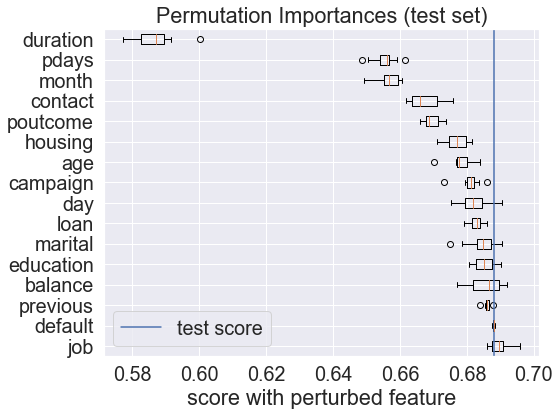

In [47]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

In [48]:
shap.initjs() 
explainer = shap.TreeExplainer(grid.best_estimator_[1])
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:100])
print(np.shape(shap_values))

(9043, 51)
(2, 100, 51)


In [49]:
index = 15 
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.8840964388409643


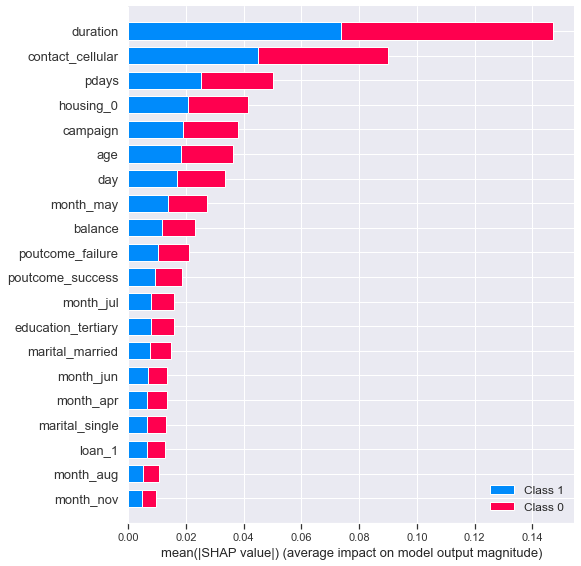

In [50]:
shap.summary_plot(shap_values, X_test_transformed[:1000], feature_names = feature_names)

**SVC**

In [69]:
param_grid = {
    "svc__kernel":['linear','poly'],
    'svc__C':[10,1,.1,.01]}

ML_algo=SVC


MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
best model parameters: {'svc__C': 0.01, 'svc__kernel': 'linear'}
roc auc score: 0.9029588836062576
Fitting 4 folds for each of 8 candidates, totalling 32 fits
best model parameters: {'svc__C': 0.01, 'svc__kernel': 'linear'}
roc auc score: 0.9073202825374533
Fitting 4 folds for each of 8 candidates, totalling 32 fits
best model parameters: {'svc__C': 0.1, 'svc__kernel': 'poly'}
roc auc score: 0.905424469327142


In [70]:
def Final_SVC(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    
   

    pipe = make_pipeline(preprocessor,SVC)    
    param_grid = {
    "svc__kernel":['linear'],
    'svc__C':[.1]}


    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    SVC_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test









In [72]:
grid, feature_names,X_test, y_test = Final_SVC(X,y,3,4)

SVC_roc_auc=grid.best_score_






Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([10.59443396]), 'std_fit_time': array([0.28133873]), 'mean_score_time': array([1.74959713]), 'std_score_time': array([0.02287321]), 'param_svc__C': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svc__kernel': masked_array(data=['linear'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'svc__C': 0.1, 'svc__kernel': 'linear'}], 'split0_test_score': array([0.89341006]), 'split1_test_score': array([0.9037796]), 'split2_test_score': array([0.90089771]), 'split3_test_score': array([0.90642318]), 'mean_test_score': array([0.90112764]), 'std_test_score': array([0.00486543]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.9042284]), 'split1_train_score': array([0.90004966]), 'split2_train_score': array([0.90468131]), 'split3_train_score': array([0.90262701]), 'mean_train_score': arra

In [54]:
nr_runs = 4
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9115079659167016
test baseline =  0.8786906999889417
shuffling age
   shuffled test score: 0.91 +/- 0.001
shuffling job
   shuffled test score: 0.9 +/- 0.003
shuffling marital
   shuffled test score: 0.908 +/- 0.001
shuffling education
   shuffled test score: 0.906 +/- 0.0
shuffling default
   shuffled test score: 0.912 +/- 0.0
shuffling balance
   shuffled test score: 0.912 +/- 0.0
shuffling housing
   shuffled test score: 0.897 +/- 0.001
shuffling loan
   shuffled test score: 0.911 +/- 0.001
shuffling contact
   shuffled test score: 0.868 +/- 0.002
shuffling day
   shuffled test score: 0.895 +/- 0.001
shuffling month
   shuffled test score: 0.815 +/- 0.004
shuffling duration
   shuffled test score: 0.735 +/- 0.006
shuffling campaign
   shuffled test score: 0.91 +/- 0.0
shuffling pdays
   shuffled test score: 0.907 +/- 0.0
shuffling previous
   shuffled test score: 0.911 +/- 0.0
shuffling poutcome
   shuffled test score: 0.862 +/- 0.001


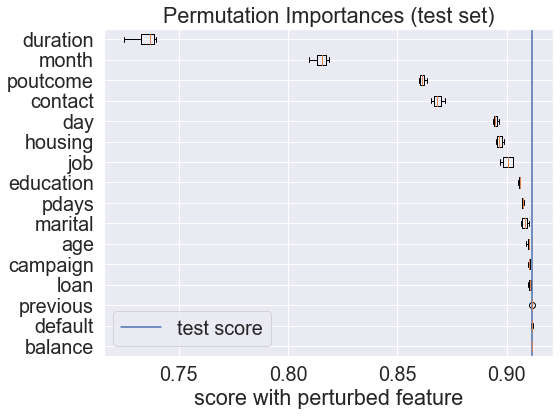

In [55]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

**K-nearest neighbors**

In [58]:
param_grid = {
    "kneighborsclassifier__n_neighbors":[10,30,50],
    'kneighborsclassifier__weights':['distance','uniform']}

ML_algo=KN
MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__weights': 'distance'}
roc auc score: 0.8178221078367783
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__weights': 'uniform'}
roc auc score: 0.8205185674951652
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__weights': 'uniform'}
roc auc score: 0.8176972806314096


In [59]:
def Final_KNN(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    

    pipe = make_pipeline(preprocessor,KN)    # the parameter(s) we want to tune
    param_grid = {
    "kneighborsclassifier__n_neighbors":[50],
    'kneighborsclassifier__weights':['distance']}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    KN_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test

In [60]:
grid, feature_names,X_test, y_test = Final_KNN(X,y,3,4)
KN_roc_auc=grid.best_score_





Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([0.0659157]), 'std_fit_time': array([0.01010485]), 'mean_score_time': array([6.37544829]), 'std_score_time': array([0.23457279]), 'param_kneighborsclassifier__n_neighbors': masked_array(data=[50],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kneighborsclassifier__weights': masked_array(data=['distance'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__weights': 'distance'}], 'split0_test_score': array([0.81748517]), 'split1_test_score': array([0.81463554]), 'split2_test_score': array([0.81706657]), 'split3_test_score': array([0.82210114]), 'mean_test_score': array([0.81782211]), 'std_test_score': array([0.00269948]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([1.]), 'split1_train_score': array([1.]), 'split2_train_score': array([1.]),

In [62]:
nr_runs = 5
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8264010764547662
test baseline =  0.8786906999889417
shuffling age
   shuffled test score: 0.818 +/- 0.001
shuffling job
   shuffled test score: 0.817 +/- 0.004
shuffling marital
   shuffled test score: 0.814 +/- 0.002
shuffling education
   shuffled test score: 0.823 +/- 0.001
shuffling default
   shuffled test score: 0.827 +/- 0.001
shuffling balance
   shuffled test score: 0.827 +/- 0.0
shuffling housing
   shuffled test score: 0.791 +/- 0.003
shuffling loan
   shuffled test score: 0.821 +/- 0.001
shuffling contact
   shuffled test score: 0.766 +/- 0.003
shuffling day
   shuffled test score: 0.803 +/- 0.003
shuffling month
   shuffled test score: 0.754 +/- 0.006
shuffling duration
   shuffled test score: 0.757 +/- 0.001
shuffling campaign
   shuffled test score: 0.825 +/- 0.0
shuffling pdays
   shuffled test score: 0.823 +/- 0.001
shuffling previous
   shuffled test score: 0.826 +/- 0.0
shuffling poutcome
   shuffled test score: 0.791 +/- 0.003


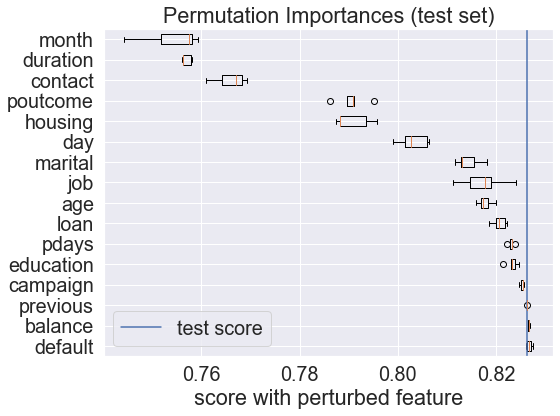

In [63]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

**XGB**

In [64]:
param_grid = {
    "gradientboostingclassifier__n_estimators":[10,100,1000],
    'gradientboostingclassifier__learning_rate':[.001,.01,1]}

ML_algo=XGB
MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 1000}
roc auc score: 0.9245666743608247
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 1000}
roc auc score: 0.9250600187169009
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 1000}
roc auc score: 0.9248797787715585


In [65]:
def Final_XGB(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
   
    pipe = make_pipeline(preprocessor,XGB)    # the parameter(s) we want to tune
    param_grid = {
    "gradientboostingclassifier__n_estimators":[1000],
    'gradientboostingclassifier__learning_rate':[.01]}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring='roc_auc' ,return_train_score = True,n_jobs=-1,verbose=10)
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    final_models.append(grid)


    y_test_pred = final_models[-1].predict(X_test)

    roc_auc=roc_auc_score(y_test_pred,y_test)
    XGB_roc_auc.append(roc_auc)
    
    print(grid.cv_results_)
    print('roc auc score: ',roc_auc)    
    print(classification_report(y_test_pred,y_test))
    
    return grid, np.array(feature_names), X_test, y_test

In [66]:
grid, feature_names,X_test, y_test = Final_XGB(X,y,3,4)
XGB_roc_auc=grid.best_score_






Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'mean_fit_time': array([46.68655187]), 'std_fit_time': array([0.19050298]), 'mean_score_time': array([0.11590725]), 'std_score_time': array([0.0016141]), 'param_gradientboostingclassifier__learning_rate': masked_array(data=[0.01],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gradientboostingclassifier__n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 1000}], 'split0_test_score': array([0.91622779]), 'split1_test_score': array([0.92551045]), 'split2_test_score': array([0.92356389]), 'split3_test_score': array([0.93296456]), 'mean_test_score': array([0.92456667]), 'std_test_score': array([0.0059573]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.93484662]), 'split1_train_score': array([0.

In [67]:
np.random.seed(3)

nr_runs = 5
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9292314049643664
test baseline =  0.8786906999889417
shuffling age
   shuffled test score: 0.925 +/- 0.001
shuffling job
   shuffled test score: 0.929 +/- 0.0
shuffling marital
   shuffled test score: 0.928 +/- 0.0
shuffling education
   shuffled test score: 0.928 +/- 0.0
shuffling default
   shuffled test score: 0.929 +/- 0.0
shuffling balance
   shuffled test score: 0.928 +/- 0.0
shuffling housing
   shuffled test score: 0.919 +/- 0.0
shuffling loan
   shuffled test score: 0.928 +/- 0.0
shuffling contact
   shuffled test score: 0.908 +/- 0.0
shuffling day
   shuffled test score: 0.925 +/- 0.0
shuffling month
   shuffled test score: 0.888 +/- 0.002
shuffling duration
   shuffled test score: 0.707 +/- 0.005
shuffling campaign
   shuffled test score: 0.927 +/- 0.001
shuffling pdays
   shuffled test score: 0.926 +/- 0.0
shuffling previous
   shuffled test score: 0.929 +/- 0.0
shuffling poutcome
   shuffled test score: 0.909 +/- 0.001


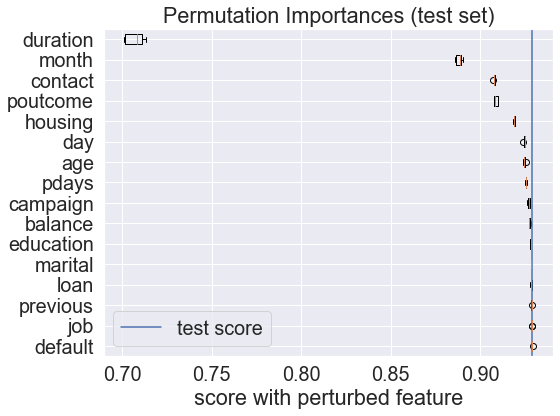

In [68]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

In [84]:
table = pd.DataFrame({'Model': ['Random Forest','Logistic Regression','Decision Tree','KNeighbors','SVC','XGB'],
                         'ROC AUC Score': [RF_roc_auc,log_roc_auc,DT_roc_auc,KN_roc_auc,SVC_roc_auc,XGB_roc_auc]})

table = table.sort_values(by='ROC AUC Score', ascending=False)

table

,Model,ROC AUC Score
5,XGB,0.924567
0,Random Forest,0.90497
4,SVC,0.901128
3,KNeighbors,0.817822
1,Logistic Regression,[0.8060940208821024]
2,Decision Tree,[0.6936481178163977]
